In [104]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [60]:
iris = datasets.load_iris()
X, Y = iris.data, iris.target

# remove virginica (y = 2)
X = X[Y != 2]
Y = Y[Y != 2]

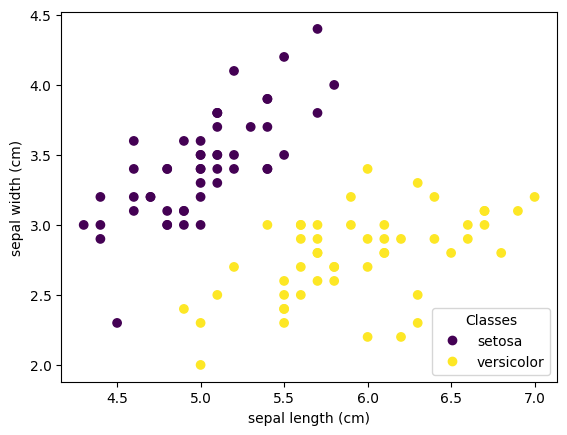

In [61]:
# Preview data
_, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)
y_train, y_test = np.where(y_train <= 0, -1, 1), np.where(y_test <= 0, -1, 1)

In [107]:
lr = 0.0001
lambda_param = 0.01

w = np.zeros(X.shape[1])
b = 0

# Linear SVM
for _ in range(100):
  for i, x_i in enumerate(X_train):
    gt = y_train[i]

    condition = gt * (np.dot(x_i, w) - b) >= 1

    if condition:
      # Update weights for correctly classified points
      w -= lr * (2 * lambda_param * w)
    else:
      # Update weights and bias for incorrectly classified points
      w -= lr * (2 * lambda_param * w - np.dot(x_i, gt))
      b -= lr * gt

In [108]:
print(f"Weights: {w} and bias: {b}")

predictions = np.sign(np.dot(X_test, w) - b)
accuracy = np.mean(predictions == y_test)

print(f"Accuracy: {accuracy}")

Weights: [-0.11114451 -0.39439016  0.60239442  0.2613278 ] and bias: 0.0675000000000009
Accuracy: 1.0


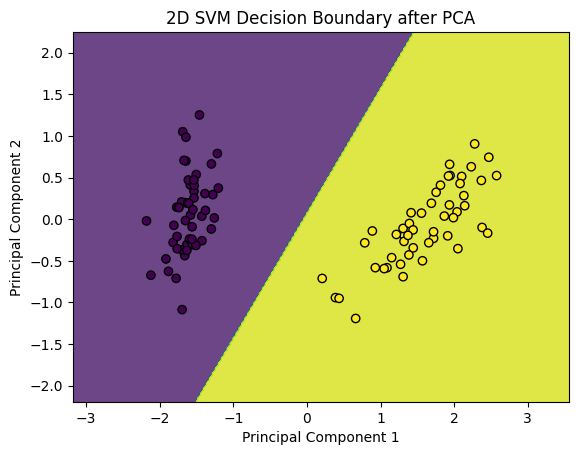

In [106]:
# Visualizing the decision boundary

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

def plot_decision_boundary_2D(X, y, pca):
    # Apply PCA transformation to input features for visualization
    X_transformed = pca.transform(X)

    # Set min and max values and give it some padding
    x_min, x_max = X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1
    y_min, y_max = X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1
    h = 0.02

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = np.sign(np.dot(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]), w) - b)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D SVM Decision Boundary after PCA')

# Plot the decision boundary on the 2D PCA-transformed dataset
plot_decision_boundary_2D(X, Y, pca)
plt.show()